In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import os

In [2]:
path = '/Users/shreyakapoor/Life_Science_Informatics/SuSe19/LSI_Tutorial2/Proj1'

In [3]:
def load_dataset(filename):
    csv_path= os.path.join(path,filename) 
    return pd.read_csv(csv_path)

In [4]:
dataset=load_dataset('diabetes.csv')

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


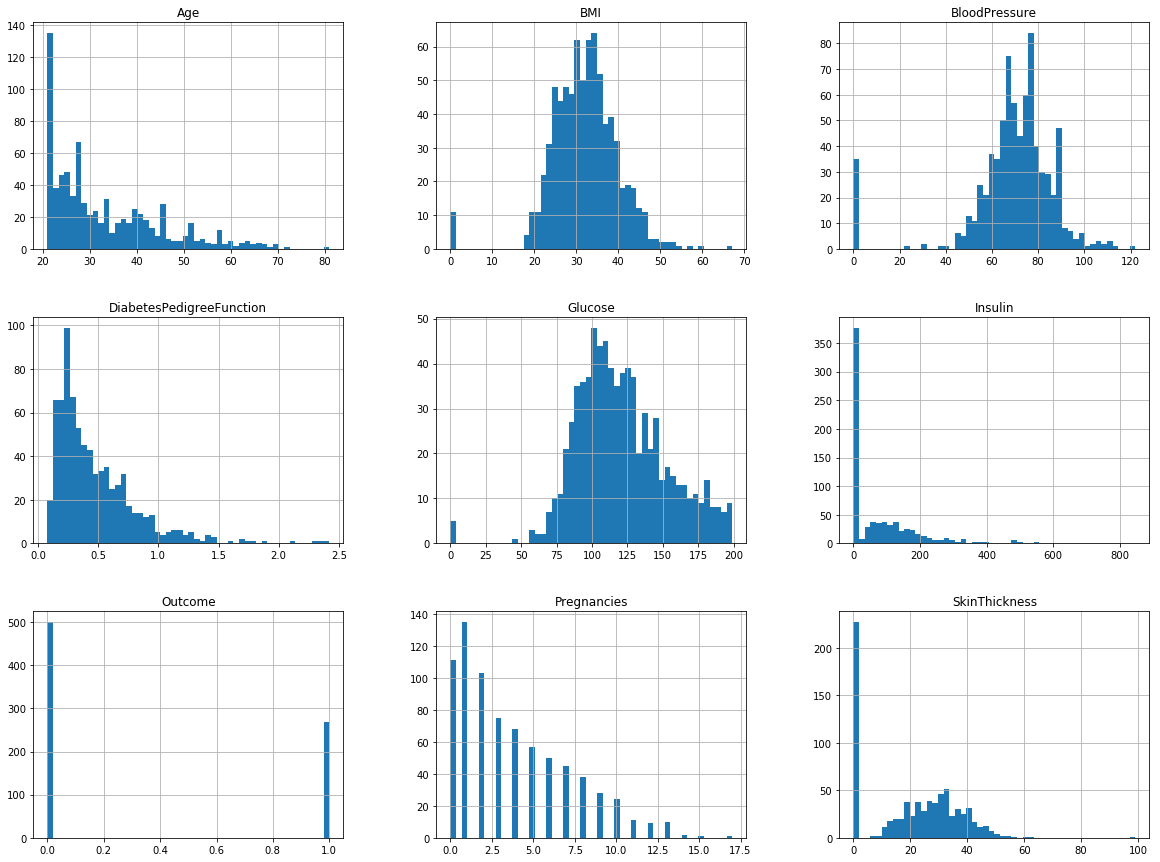

In [8]:
dataset.hist(bins=50, figsize = (20,15))
plt.show()

In [9]:
def correl_draw(dataset): 
# with the dataframe correlation function
    corr = dataset.corr()
    fig, ax = plt.subplots(figsize = (20, 20))
    # Colours the rectangles by correlation value
    d = ax.matshow(corr,cmap='jet')
    # Draws x ticks labels
    plt.xticks(range(len(corr.columns)), corr.columns)
    # Draws y ticks labels
    plt.yticks(range(len(corr.columns)), corr.columns)
    # Shows figure
    fig.colorbar(d)
    plt.show()

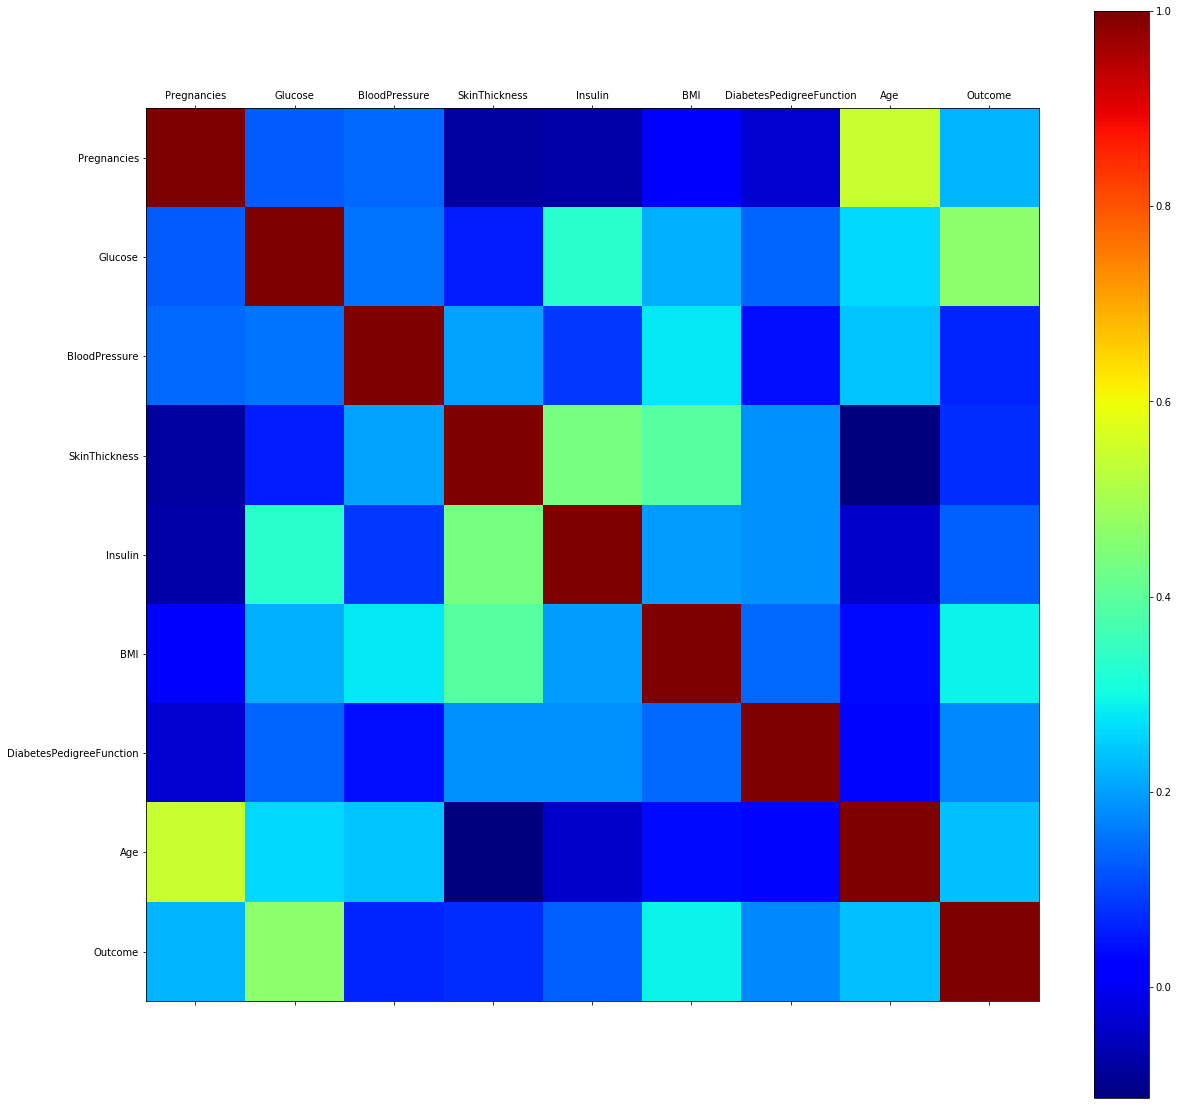

In [10]:
correl_draw(dataset)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
# Create features and labels
features = dataset.drop(['Outcome'], axis=1) 
labels = dataset['Outcome']
features2 = dataset.drop(['Outcome','BloodPressure','SkinThickness'],axis = 1)
features3 = features2.drop(['Insulin'], axis =1)
features4 = features3.drop(['DiabetesPedigreeFunction'],axis = 1)
list_features = [features,features2,features3,features4]

In [13]:
def evaluate_features(list_features,labels, testsize): 
    l1 = [3,4,7,8]
    acc = []
    prec = []
    rec = []
    f1 = []
    print ('accuracy','precision ','recall ', '   f1')
    i = 1
    for feature in list_features : 
        print ('feature',i )
        i+=1
        acc1 = []
        prec1 = []
        rec1 = []
        f1_1 = []
        for k in [3,4,7,8]: 
            features_train, features_test, labels_train, labels_test = train_test_split(feature, labels, test_size=testsize,random_state = 42)
            print ('k=',k)
            classifier = KNeighborsClassifier(n_neighbors = k )
            # Fit data
            classifier.fit (features_train, labels_train)

            pred = classifier.predict(features_test)
            accuracy = accuracy_score(labels_test, pred)
            precision = precision_score (labels_test, pred)
            recall = recall_score(labels_test, pred)
            f1s = f1_score(pred,labels_test)
            acc1.append(accuracy)
            prec1.append(precision)
            rec1.append(recall)
            f1_1.append(f1s)
            print ('{:.2f}'.format(accuracy),"   ", '{:.2f}'.format(precision)," ",'{:10.2f}'.format(recall), '{:10.2f}'.format(f1s))
        acc.append(acc1)
        prec.append(prec1)
        rec.append(rec1)
        f1.append(f1_1)
    return acc, prec, rec, f1

In [14]:
def plot_metrics(list_feature,labels, testsize):
    acc,prec,rec,f1 = evaluate_features(list_features, labels, testsize)
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize= (25,6))
    l1 =[3,4,7,8]
    for (a,b) in [(ax1,acc),(ax2,prec),(ax3,rec),(ax4,f1)]: 
            for i in range(len(b[0])): 
                #print (l1,b[:][i])
                a.scatter(l1,b[:][i])
                a.plot(l1,b[i])
            a.legend(['features','features2','features3','features4'])
    ax1.set_ylabel('accuracy')
    ax2.set_ylabel('precision')
    ax3.set_ylabel('recall')
    ax4.set_ylabel('f1')
    for a in [ax1,ax2,ax3,ax4]: 
        a.set_xlabel('n_neighbors')

accuracy precision  recall     f1
feature 1
k= 3
0.65     0.51         0.64       0.56
k= 4
0.71     0.61         0.49       0.55
k= 7
0.69     0.56         0.62       0.59
k= 8
0.75     0.65         0.62       0.64
feature 2
k= 3
0.67     0.53         0.62       0.57
k= 4
0.71     0.61         0.49       0.55
k= 7
0.70     0.58         0.62       0.60
k= 8
0.72     0.63         0.53       0.57
feature 3
k= 3
0.74     0.64         0.62       0.63
k= 4
0.75     0.71         0.53       0.60
k= 7
0.74     0.63         0.65       0.64
k= 8
0.76     0.70         0.58       0.63
feature 4
k= 3
0.74     0.64         0.62       0.63
k= 4
0.75     0.71         0.53       0.60
k= 7
0.74     0.63         0.65       0.64
k= 8
0.77     0.70         0.60       0.65


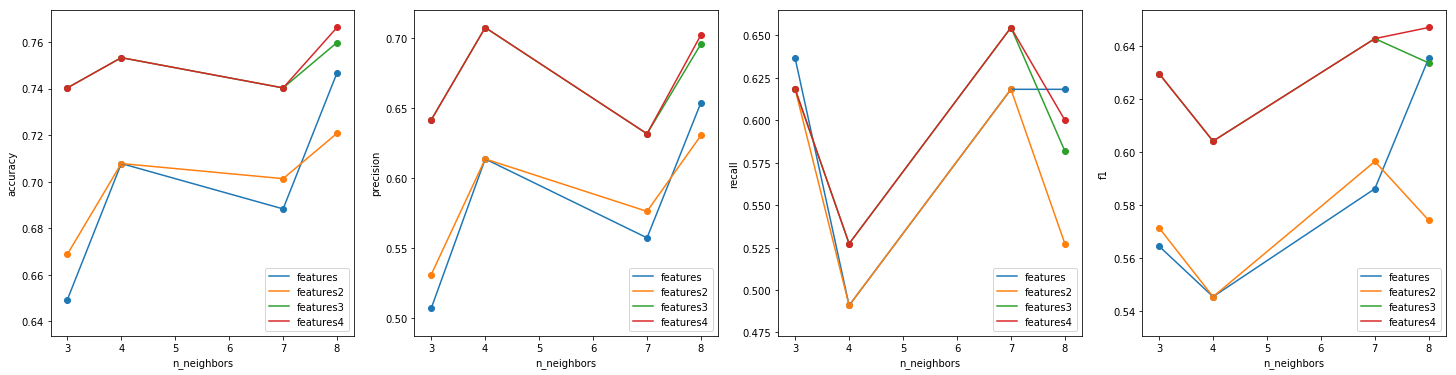

In [15]:
plot_metrics(list_features,labels, 0.20)

In [16]:
dataset2 = load_dataset('heart.csv')

In [17]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [18]:
dataset2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


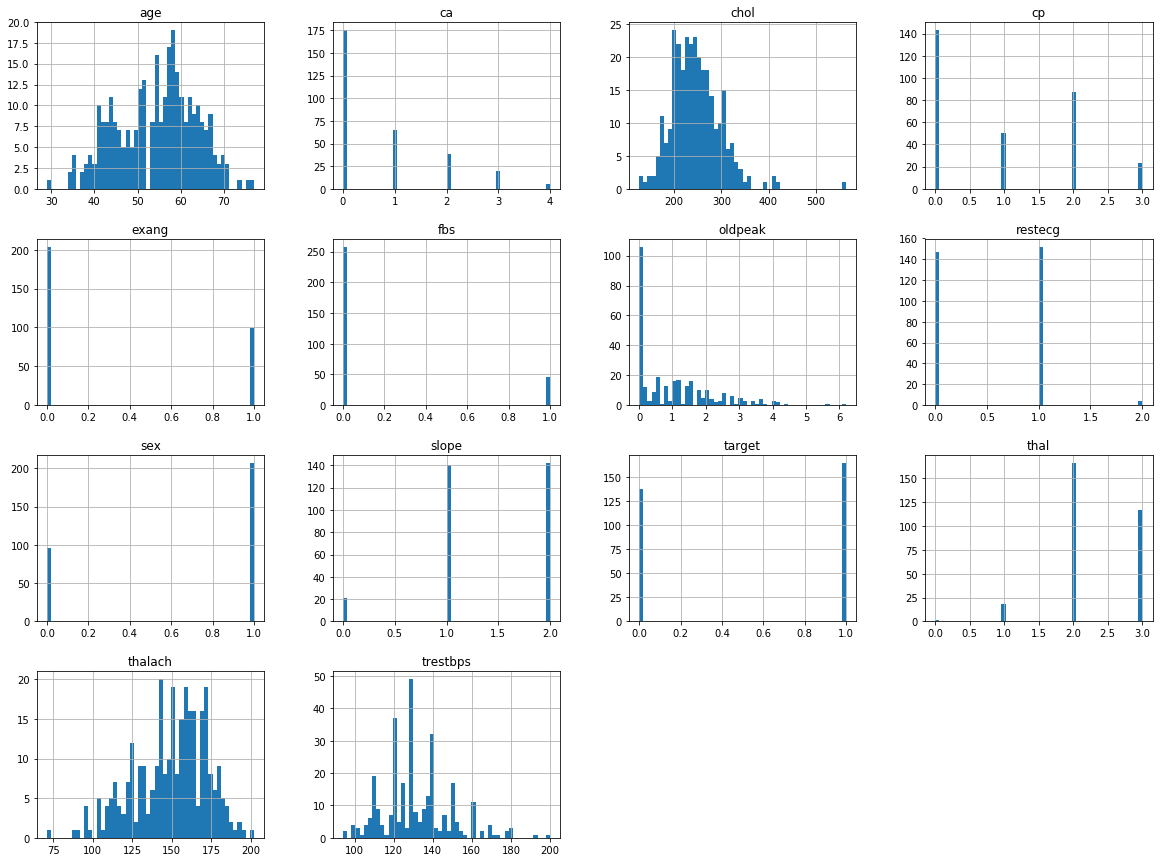

In [19]:
dataset2.hist(bins=50, figsize = (20,15))
plt.show()

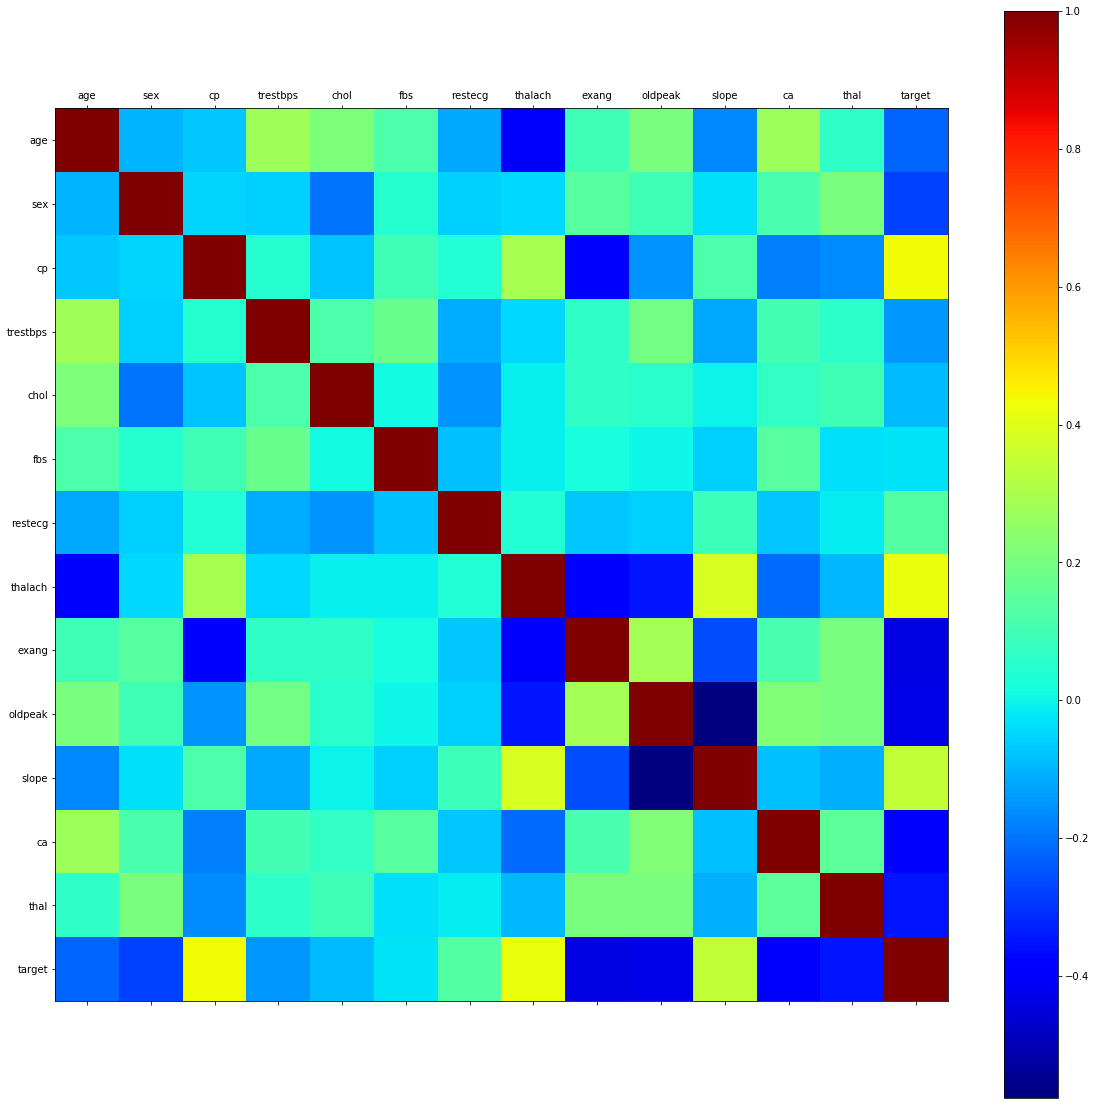

In [20]:
correl_draw(dataset2)

In [21]:
# Create features and labels
features = dataset2.drop(['target'], axis=1) 
labels = dataset2['target']

accuracy precision  recall     f1
feature 1
k= 3
0.66     0.69         0.64       0.67
k= 4
0.67     0.74         0.59       0.66
k= 7
0.71     0.70         0.79       0.75
k= 8
0.70     0.73         0.69       0.71
feature 2
k= 3
0.66     0.69         0.64       0.67
k= 4
0.67     0.74         0.59       0.66
k= 7
0.71     0.70         0.79       0.75
k= 8
0.70     0.73         0.69       0.71
feature 3
k= 3
0.66     0.69         0.64       0.67
k= 4
0.67     0.74         0.59       0.66
k= 7
0.71     0.70         0.79       0.75
k= 8
0.70     0.73         0.69       0.71
feature 4
k= 3
0.66     0.69         0.64       0.67
k= 4
0.67     0.74         0.59       0.66
k= 7
0.71     0.70         0.79       0.75
k= 8
0.71     0.74         0.72       0.73


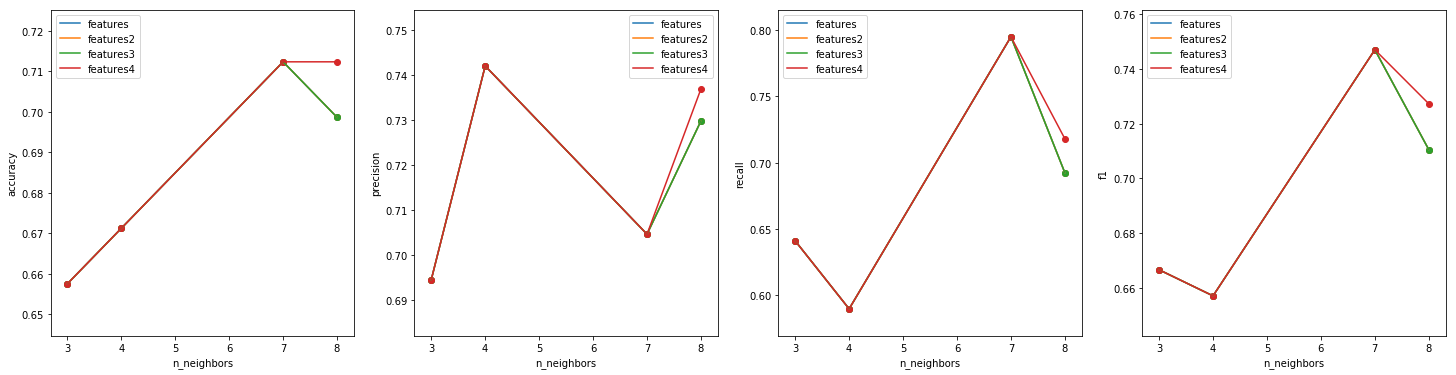

In [22]:
features2 = dataset2.drop(['fbs','thal'],axis = 1) #fbs is most uncorrelated to anything, thal seems correlated with other features.
features3 = features2.drop(['ca'],axis = 1) #seems quite correlated to other features.
features4 = features3.drop(['slope'],axis = 1) #negative correl to oldpeak so we can drop either. 
list_features = [features,features2,features3,features4]
plot_metrics(list_features, labels, 0.24)

Similiar measures after reducing the dataset.

Answer to task 4 

Which performance test is more indicative in this example? Explain by giving
examples from the tasks. 

The f1 score is more indicative. Since we want to minimize the False Negatives i.e. a person who actually has Diabetes/ Heart disease should not be predicted to not have one. Also the False Positives are less when there is a higher F1 score. So the F1 score is most indicative. 